In [1]:
#BUILDING YOUR OWN CHATBOT:EXPLORING NATURAL LANGUAGE PROCESSING TECHNIQUES WITH NLTK AND NEURAL NETWORK

In [2]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Reading

In [3]:
import json

with open('intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."
...,...,...,...
75,fact-28,[What do I do if I'm worried about my mental h...,[The most important thing is to talk to someon...
76,fact-29,[How do I know if I'm unwell?],"[If your beliefs , thoughts , feelings or beha..."
77,fact-30,[How can I maintain social connections? What i...,"[A lot of people are alone right now, but we d..."
78,fact-31,[What's the difference between anxiety and str...,[Stress and anxiety are often used interchange...


Each tag contains several questions(patterns) and several answers(responses); Now I want to seperate these patterns based on their tags and responses and finally convert them to a DataFrame.

In [4]:
    dic = {"tag":[], "patterns":[], "responses":[]}
    for i in range(len(df)):
        ptrns = df[df.index == i]['patterns'].values[0]
        rspns = df[df.index == i]['responses'].values[0]
        tag = df[df.index == i]['tag'].values[0]
        for j in range(len(ptrns)):
            dic['tag'].append(tag)
            dic['patterns'].append(ptrns[j])
            dic['responses'].append(rspns)

    df = pd.DataFrame.from_dict(dic)
    df

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


In [5]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
       'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'friends', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'pandora-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
       'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
       'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15',
       'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21',
       'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27',
       'fact-28', 'fact-29', '

# Data Preprocessing

Now I am going to apply some text preprocessing stuffs such as lowering, punctuation removing and then tokenize the patterns.

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(lower=True, split=' ')
tokenizer.fit_on_texts(df['patterns'])
tokenizer.get_config()

{'num_words': None,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 232,
 'word_counts': '{"hi": 2, "hey": 2, "is": 13, "anyone": 2, "there": 5, "hello": 1, "howdy": 1, "hola": 1, "bonjour": 1, "konnichiwa": 1, "guten": 1, "tag": 1, "ola": 1, "good": 5, "morning": 1, "afternoon": 1, "evening": 1, "night": 1, "bye": 3, "see": 2, "you": 38, "later": 1, "goodbye": 1, "au": 1, "revoir": 1, "sayonara": 1, "ok": 4, "then": 1, "fare": 1, "thee": 1, "well": 2, "thanks": 2, "thank": 3, "that\'s": 3, "helpful": 1, "for": 10, "the": 10, "help": 6, "than": 1, "very": 3, "much": 4, "nothing": 3, "who": 6, "are": 15, "what": 29, "tell": 6, "me": 19, "more": 6, "about": 20, "yourself": 3, "your": 3, "name": 4, "should": 3, "i": 95, "call": 1, "what\'s": 3, "can": 16, "do": 14, "created": 2, "how": 8, "were": 2, "made": 1, "my": 13, "am": 17, "go": 4, "by": 1, "could": 2, "give": 1, "a": 12, "hand": 1, "ple

In [7]:
vacab_size = len(tokenizer.word_index)
print('number of unique words = ', vacab_size)

number of unique words =  303


In [8]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

ptrn2seq = tokenizer.texts_to_sequences(df['patterns'])
X = pad_sequences(ptrn2seq, padding='post')
print('X shape = ', X.shape)

lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['tag'])
print('y shape = ', y.shape)
print('num of classes = ', len(np.unique(y)))

X shape =  (232, 18)
y shape =  (232,)
num of classes =  80


In [9]:
X

array([[ 95,   0,   0, ...,   0,   0,   0],
       [ 96,   0,   0, ...,   0,   0,   0],
       [ 14,  97,  41, ...,   0,   0,   0],
       ...,
       [ 76,  19,  66, ...,   0,   0,   0],
       [ 76,  19,  66, ...,   0,   0,   0],
       [ 66,  67, 149, ...,   0,   0,   0]])

In [10]:
y

array([44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 55,  1, 10, 58, 43,
       43, 43, 43, 43, 43, 43, 43, 73, 73, 73, 73, 73, 60, 57,  0,  0,  0,
        0,  0,  0,  0,  0, 67,  5,  5,  5, 56, 56, 56, 48, 48, 48, 48, 48,
       48, 48, 65, 65, 65, 65, 65, 65, 65, 65, 70, 70, 70, 70, 70, 78, 78,
       78, 78, 78,  8,  8,  8,  8, 45, 45, 45, 45, 45, 45, 45,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  2,  2, 61, 61, 61, 61, 68, 68, 68,
       68, 68, 68, 66, 66, 66, 66,  6,  6,  6,  6,  6,  6, 74, 74, 74, 74,
       74, 74,  9,  9,  9,  9,  9, 72, 72, 72, 72, 72, 47, 47, 47, 46, 46,
       46,  7,  7,  7,  7,  7,  7,  7,  7, 49, 49, 64, 64, 64, 79, 79, 79,
       79, 71, 71, 71, 71, 52, 52, 52, 69, 69, 69, 69, 42,  3, 63, 63, 59,
       59, 59, 51, 51, 51, 76, 76, 53, 53, 77, 77, 62, 75, 75, 75, 50, 50,
       50, 54, 54, 11, 11, 22, 22, 33, 33, 37, 37, 37, 37, 38, 38, 39, 39,
       39, 40, 41, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26,
       27, 28, 29, 29, 30

In [11]:
!pip install pydot
!pip install graphviz

# Build and Train Model

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 18, 100)             │          30,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 18, 32)              │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization                  │ (None, 18, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 18, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_1                │ (None, 18, 32)              │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_2                │ (None, 32)                  │              64 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_3                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_normalization_4                │ (None, 128)                 │             256 │
│ (LayerNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │          10,320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,824 (374.31 KB)

 Trainable params: 95,824 (374.31 KB)

 Non-trainable params: 0 (0.00 B)

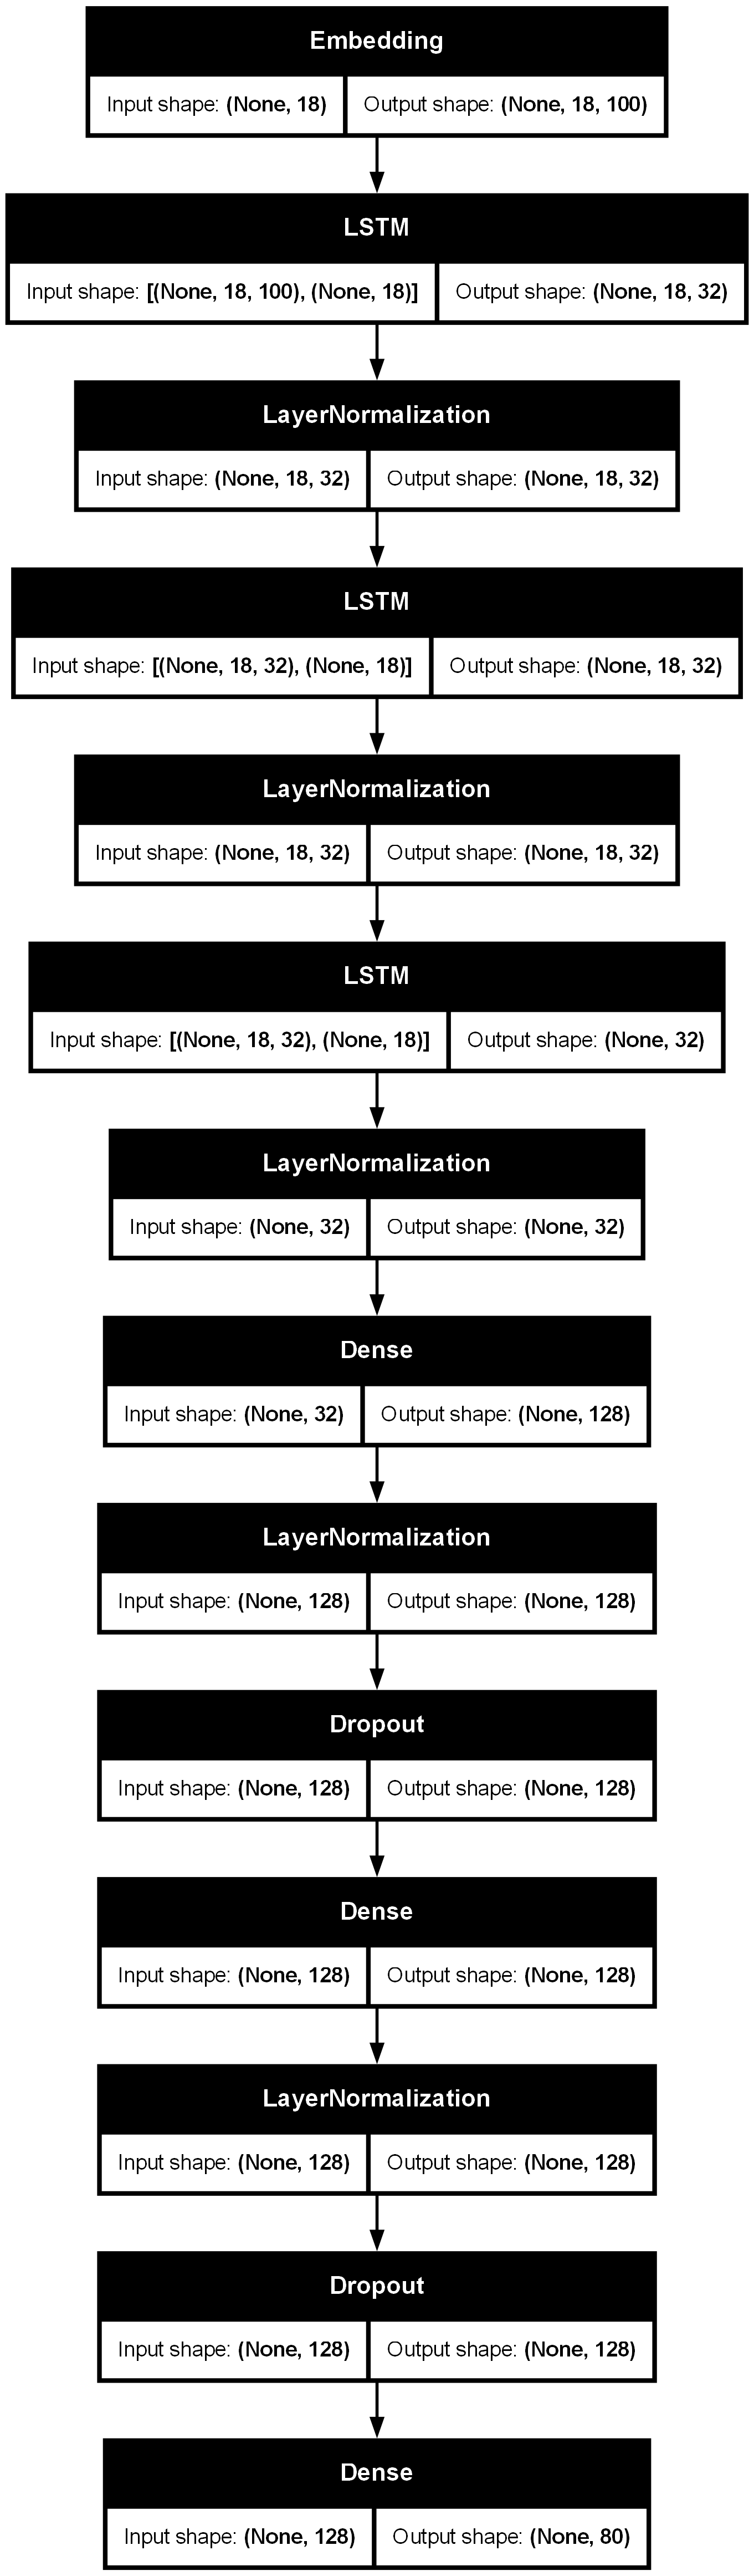

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, LayerNormalization, Dense, Dropout
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Input(shape=(X.shape[1], )))
model.add(Embedding(input_dim=vacab_size+1, output_dim=100, mask_zero=True))
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32, return_sequences=True))
model.add(LayerNormalization())
model.add(LSTM(32))
model.add(LayerNormalization())
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(LayerNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

In [17]:
model_history = model.fit(x=X,
                          y=y,
                          batch_size=10,
                          callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)],
                          epochs=50)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.0138 - loss: 5.0448    
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.1260 - loss: 3.7446
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.3178 - loss: 2.9903
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.3789 - loss: 2.6161
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4892 - loss: 2.1392
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5788 - loss: 1.7824
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6920 - loss: 1.4702 
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7042 - loss: 1.2901 
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8057 - loss: 0.9295
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8427 - loss: 0.8849
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8554 - loss: 0.7658
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - ac

# Model Testing

First we should apply some text preprocessing on the pattern that is passed to the function. Next we convert the text to vector of numbers and give it to model for prediction its tag; Finally based on the tag, we choose a answer(response) randomly and return it.

In [18]:
import re
import random

def generate_answer(pattern): 
    text = []
    txt = re.sub('[^a-zA-Z\']', ' ', pattern)
    txt = txt.lower()
    txt = txt.split()
    txt = " ".join(txt)
    text.append(txt)
        
    x_test = tokenizer.texts_to_sequences(text)
    x_test = np.array(x_test).squeeze()
    x_test = pad_sequences([x_test], padding='post', maxlen=X.shape[1])
    y_pred = model.predict(x_test)
    y_pred = y_pred.argmax()
    tag = lbl_enc.inverse_transform([y_pred])[0]
    responses = df[df['tag'] == tag]['responses'].values[0]

    print("you: {}".format(pattern))
    print("model: {}".format(random.choice(responses)))

In [19]:
generate_answer('Hi! How are you?')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 999ms/step
you: Hi! How are you?
model: Hello there. Glad to see you're back. What's going on in your world right now?


In [20]:
generate_answer('Maybe I just didn\'t want to be born :)')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
you: Maybe I just didn't want to be born :)
model: You can talk to me without fear of judgement.


In [21]:
generate_answer('help me:')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
you: help me:
model: Tell me your problem so that i can assist you


In [22]:
generate_answer(':')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
you: :
model: Please don't hesitate to talk to me.


In [ ]:
def chatbot():
    print("Chatbot: Hi! I'm your friendly chatbot. How can I assist you today?")
    
    while True:
        user_input = input("You: ")
        if user_input.lower() in ['quit', 'exit', 'q', 'bye']:
            print("Chatbot: Goodbye!")
            break

        generate_answer(user_input)

if __name__ == "__main__":
    chatbot()

Chatbot: Hi! I'm your friendly chatbot. How can I assist you today?
